<a href="https://colab.research.google.com/github/somideepthi/games-data/blob/master/Keyword_Suggessions_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**GAME DESCRIPTION ANALYSIS AND KEYWORD SUGGESTIONS**

The Game data scrapped from the playstore is imported into the notebook. 
The required libraries are imported like pandas to work with the datasets, matplotlib to do the visualizations and draft the graphs.


In [1]:
# libraries for basic operations and plots
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
%matplotlib inline
import seaborn as sb

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Below we have other libraries imported that work with K-Means clustering model.

In [0]:
#libraries used for modelling
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

The text analysis is done using the vectorizers that tend to operate on the description given to extract importand words from it.

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

Some of the other libraries supported by the python to work on text are impoted here that uses NLP (Natural language procesing) and NLTK (Natural language tool kit) 

In [4]:
#libraries for NLP operations
import re
from bs4 import BeautifulSoup

import string
string.punctuation

import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')
stopword=nltk.corpus.stopwords.words('english')
all_words = set(nltk.corpus.words.words())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [0]:
from collections import Counter
from nltk.stem.porter import PorterStemmer

porter = PorterStemmer()

The Google drive is connected tp the notebook and the files available in the drive were mounted using the below code.

In [6]:
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [7]:
cd /content/gdrive

/content/gdrive


In [8]:
ls

'My Drive'/


The batch file containing gaming data is imported at first from the drive.

In [9]:
# /content/gdrive/My Drive/Batchfile1.csv
df1=pd.read_csv('My Drive/Batchfile1.csv')
df1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
0,New Sniper Shooter: Free offline 3D shooting g...,com.lf.sniper.gun.shooter.free.apps,https://play.google.com/store/apps/details?id=...,Welcome to the world of sniper assassin. Hold ...,Play gun fighter games with best shooting game...,"10,000,000+",10000000.0,4.219719,89288.0,38561.0,0.0,TRUE,USD,TRUE,64M,4.1,The Knights Pvt Ltd,6.43946E+18,snipershooting.techhelp@gmail.com,http://www.theknights.com.pk,http://www.theknightzpvt.com/home/privacypolicy,6.439460e+18,Action,GAME_ACTION,https://lh3.googleusercontent.com/ICDWRz7acbnC...,https://lh3.googleusercontent.com/oq6XPZDMmztX...,Mature 17+,"Violence, Blood",TRUE,TRUE,"Sep 21, 2017",1582700879,1.63,NaN,"[""Love your game, controlling the scope is so ..."
1,Cover Fire: Offline Shooting Games,com.generagames.resistance,https://play.google.com/store/apps/details?id=...,Your duty is to lead the battle and become the...,Best Offline Shooter and Sniper Game on mobile...,"50,000,000+",50000000.0,4.518721,1531839.0,585315.0,0.0,TRUE,USD,TRUE,46M,4.1,Genera Games,7.30921E+18,indiesupport@generagames.com,http://www.generagames.com/,http://generagames.com/product-privacy/,7.309210e+18,Action,GAME_ACTION,https://lh3.googleusercontent.com/HAqwf-Cu9Nl2...,https://lh3.googleusercontent.com/DJ-Q23WLgP97...,Teen,"Violence, Blood",TRUE,TRUE,"Mar 30, 2017",1581761404,1.18.1,+ Perk Grenades now explodes when hit with the...,"[""It's addicting the graphics are great even i..."
2,Shooting World - Gun Fire,com.bello.shootingworld,https://play.google.com/store/apps/details?id=...,"Welcome to Shooting World, an incredible 3D FP...","3D shooting games, Variety of powerful guns ar...","10,000,000+",10000000.0,4.696745,724837.0,297932.0,0.0,TRUE,USD,TRUE,63M,4.1,Gun Fire Studio,Gun+Fire+Studio,oiproduce986733@gmail.com,https://touchingfuture.com,https://sites.google.com/view/privacy-policy-b...,8.587500e+18,Sports,GAME_SPORTS,https://lh3.googleusercontent.com/2c5rympOps_9...,https://lh3.googleusercontent.com/qXrsUiayVpPt...,Teen,Suggestive Themes,TRUE,TRUE,"Nov 11, 2018",1582369037,1.2.2,"We fixed the bug in this release, optimized th...","[""Great graphics! As I advanced the variety of..."
3,Modern Sniper,com.xs.armysniper,https://play.google.com/store/apps/details?id=...,Aim and Shoot! Modern Sniper is #1 first perso...,Modern Sniper is #1 first person shooter game ...,"50,000,000+",50000000.0,4.292898,1128271.0,295097.0,0.0,TRUE,USD,TRUE,10M,4,Candy Mobile,Candy+Mobile,contact@candy-mobile.com,http://www.candy-mobile.com,http://www.candy-mobile.com/policy.htm,4.963790e+18,Action,GAME_ACTION,https://lh3.googleusercontent.com/A68VT_zLg4Ws...,https://lh3.googleusercontent.com/qm2KxS5Cmn-V...,Teen,"Violence, Blood",TRUE,TRUE,"Dec 3, 2014",1559202575,2.2,Fixed some crash bugs of the game. Thanks.,['Very good game graphics are very good contro...
4,Wild Hunt:Sport Hunting Games. Hunter & Shoote...,com.tensquaregames.huntmobile,https://play.google.com/store/apps/details?id=...,"Time to collect your hunting gear, load a gun,...",Enjoy one of the best deer hunting simulator g...,"10,000,000+",10000000.0,4.626748,299482.0,99422.0,0.0,TRUE,USD,TRUE,59M,4.4,Ten Square Games: Sport Hunting and Fishing Games,6.83734E+18,support.wildhunt@tensquaregames.com,https://tensquaregames.com,https://tensquaregames.com/wp-content/uploads/...,6.837340e+18,Simulation,GAME_SIMULATION,https://lh3.googleusercontent.com/3N7LlZYktkOl...,https://lh3.googleusercontent.com/tJxqfYmuLRzh...,Teen,"Violence, Blood",NaN,NaN,"Jul 19, 2017",1580717997,1.373,Oh Shoot! New fixes! Charge right into the gam...,['Its a fun game. Fun to play. Controlling cou...


The gaming dataset is imported from google drive and the column names were extracted.

In [10]:
df2=pd.read_csv('My Drive/Gaming.csv')
del df2['keywords']
fea=df2.columns
fea

Index(['Titlle', 'AppID', 'URL', 'Description', 'Summary', 'Installs',
       'MinInstalls', 'Score', 'Rating', 'Reviews', 'Price', 'Free',
       'Currency', 'OffersIAP', 'Size', 'Android Version', 'Developer',
       'Developer ID', 'Developer Email', 'Developer Website',
       'Privacy policy', 'DeveloperInternal ID', 'Genre', 'Genre ID', 'Icon',
       'Header Image', 'Content Rating', 'Content Rating description',
       'adSupported', 'ContainsAds', 'released date', 'Updated', 'Version',
       'Recent Changes', 'Comments'],
      dtype='object')

As the first dataframe, df1 doesnt posses column names, the feature names of the gamin dataset, df2 were assigned to df1.

In [0]:
df1.columns=fea

In [12]:
df2.head()
# print(len(df1))
# len(df2)

,Titlle,AppID,URL,Description,Summary,Installs,MinInstalls,Score,Rating,Reviews,Price,Free,Currency,OffersIAP,Size,Android Version,Developer,Developer ID,Developer Email,Developer Website,Privacy policy,DeveloperInternal ID,Genre,Genre ID,Icon,Header Image,Content Rating,Content Rating description,adSupported,ContainsAds,released date,Updated,Version,Recent Changes,Comments
0,Sniper 3D: Fun Offline Gun Shooting Games Free,com.fungames.sniper3d,https://play.google.com/store/apps/details?id=...,"Call the best shooter, the guns are ready to a...",Fun cool free action shooting! The best online...,"10,00,00,000",100000000,4.485727,12104202.0,4189270.0,0.0,True,USD,True,Varies with device,Varies,Fun Games For Free,Fun+Games+For+Free,support+sniper3d@fungames-forfree.com,https://wildlifestudios.com/,https://www.fungames-forfree.com/games/sniper3...,5.780000e+18,Action,GAME_ACTION,https://lh3.googleusercontent.com/mVlPRwyYHxpe...,https://lh3.googleusercontent.com/LDDEaywnb01V...,Mature 17+,"Drug Reference, Violence, Blood",True,True,"Nov 13, 2014",1580912194,Varies with device,#ERROR!,['The game is alright but the greedy developer...
1,Soul Knight,com.ChillyRoom.DungeonShooter,https://play.google.com/store/apps/details?id=...,"“In a time of gun and sword, the magical stone...","Explore the dungeon, collect crazy weapons, do...","1,00,00,000",10000000,4.471023,874292.0,404858.0,0.0,True,USD,True,101M,4.1,ChillyRoom,ChillyRoom,info@chillyroom.com,NaN,https://gist.github.com/zeyangl/443bff08db2dca...,7.230000e+18,Action,GAME_ACTION,https://lh3.googleusercontent.com/2vOY0LhrtGD6...,https://lh3.googleusercontent.com/TNmeFAK9COoU...,Everyone,NaN,True,True,"Feb 16, 2017",1578911499,2.5.1,* Happy Spring Festival! The camp has been ren...,"['This game is fun itself but, it is more fun ..."
2,Last Day on Earth: Survival,zombie.survival.craft.z,https://play.google.com/store/apps/details?id=...,The survival shooter Last Day on Earth is set ...,Survive in the zombie world,"5,00,00,000",50000000,4.308150,3579297.0,1818068.0,0.0,True,USD,True,Varies with device,4.1,Kefir!,8.78E+18,support@kefirgames.com,http://kefirgames.ru/en,http://www.kefirgames.ru/privacy_policy.html,8.780000e+18,Action,GAME_ACTION,https://lh3.googleusercontent.com/wlCrIqUz6XqW...,https://lh3.googleusercontent.com/RnrqQXdgtpJY...,Teen,"Violence, Blood",NaN,NaN,"May 24, 2017",1582202218,1.16.3,– City in the crater discovered!\n – Distribu...,['I really love this game! It is the first gam...
3,Mobile Legends: Bang Bang,com.mobile.legends,https://play.google.com/store/apps/details?id=...,Join your friends in a brand new 5v5 MOBA show...,"A thrilling 5v5 MOBA, now featuring a 99-playe...","10,00,00,000",100000000,4.385017,16983255.0,8428438.0,0.0,True,USD,True,99M,4.1,Moonton,8.53E+18,MobileLegendsGame@gmail.com,https://m.mobilelegends.com/,https://m.mobilelegends.com/en/newsdetail/475,8.530000e+18,Action,GAME_ACTION,https://lh3.googleusercontent.com/sMLmOgkuK67q...,https://lh3.googleusercontent.com/Cj1tfFMn8QiN...,Teen,"Fantasy Violence, Suggestive Themes",True,True,42674,1582079434,Varies with device,"1. New Hero: The Embrace of Night, Cecilion wi...","[""This is a genuine review. This is a great ga..."
4,DEAD TARGET: Zombie Shooting,com.vng.g6.a.zombie,https://play.google.com/store/apps/details?id=...,Keep your defense up and shoot zombies in one ...,━╤デ╦︻(▀̿̿Ĺ̯̿̿▀̿ ̿)The plague of the zombie apo...,"5,00,00,000",50000000,4.526970,1735661.0,640169.0,0.0,True,USD,True,Varies with device,4.1,VNG GAME STUDIOS,5.58E+18,support.global@vng.com.vn,https://www.facebook.com/deadtarget,https://deadtarget.com/,5.580000e+18,Action,GAME_ACTION,https://lh3.googleusercontent.com/NqDH18wBNfrN...,https://lh3.googleusercontent.com/BNoXi6S60hJe...,Mature 17+,"Intense Violence, Blood",True,True,41806,1582513613,Varies with device,"Dear Survivals,\n We give to you new experime...","[""Really good game to a point. Twice this game..."


The two dataframes each consisting of two batch files of datasets are merged together into a dataframe-rawset.

In [0]:
rawset= pd.concat([df1,df2],ignore_index=True,sort=False)

The merged data frame is filtered out of duplicate data with respect to Tittle, AppId and Game url using the drop.duplicates

In [14]:
rawset=rawset.drop_duplicates(subset=['Titlle','AppID','URL'],keep='first',inplace=False)
rawset=rawset.reset_index(inplace=False, drop=True)
len(rawset)

15150

All the features that doesnt quite go along in suggesting the keywords were ignored leaving only the features extracted below.

In [0]:
data=rawset[['Titlle','AppID','Description','Genre','Score','MinInstalls','Reviews','Free','Currency','Size','Android Version','Genre ID','Version']]

Again the filtering is done by removing the duplicates based on AppID.

In [16]:
data.drop_duplicates(subset='AppID',keep="first",inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
data.dtypes

Titlle              object
AppID               object
Description         object
Genre               object
Score              float64
MinInstalls        float64
Reviews            float64
Free                object
Currency            object
Size                object
Android Version     object
Genre ID            object
Version             object
dtype: object

**DATA VISUALIZATION**

Now that we have gathered all the relevant features necesary for the problem statement, we will further clean the data by analyzing and visualizing the data using plots and get a keen look at the features to decide further and identifying the relationship between the features.



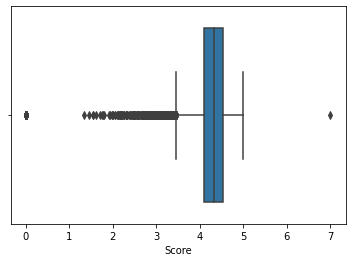

In [18]:
#checking the anamolies in Score column 

sb.boxplot(x=data['Score'])

In [19]:
#deleting the anomalies in the score feature
rawset.loc[np.where(rawset['Score']>5)]

,Titlle,AppID,URL,Description,Summary,Installs,MinInstalls,Score,Rating,Reviews,Price,Free,Currency,OffersIAP,Size,Android Version,Developer,Developer ID,Developer Email,Developer Website,Privacy policy,DeveloperInternal ID,Genre,Genre ID,Icon,Header Image,Content Rating,Content Rating description,adSupported,ContainsAds,released date,Updated,Version,Recent Changes,Comments
11299,0,1,2,3,4,5,6.0,7.0,8.0,9.0,10.0,11,12,13,14,15,16,17,18,19,20,21.0,22,23,24,25,26,27,28,29,30,31,32,33,34


Dropping the datapoint that has rating score greater than 5.

In [0]:
data=data.drop(11299)

A histogram is plotted to identify the games rating score and its distribution over the games. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f044b36e6d8>]],
      dtype=object)

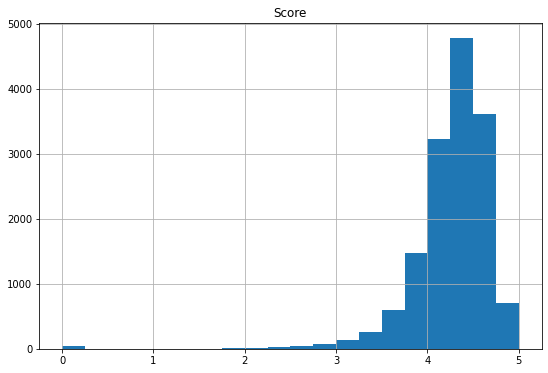

In [21]:
data.hist(column="Score",figsize=(9,6),bins=20)

Providing an index called ID forthe dataframe.

In [22]:
#changing the index and adding an ID column to this dataframe

data=data.reset_index(inplace=False, drop=True)
data.insert(0, 'ID', range(1, 1 + len(data)))
data

,ID,Titlle,AppID,Description,Genre,Score,MinInstalls,Reviews,Free,Currency,Size,Android Version,Genre ID,Version
0,1,New Sniper Shooter: Free offline 3D shooting g...,com.lf.sniper.gun.shooter.free.apps,Welcome to the world of sniper assassin. Hold ...,Action,4.219719,10000000.0,38561.0,TRUE,USD,64M,4.1,GAME_ACTION,1.63
1,2,Cover Fire: Offline Shooting Games,com.generagames.resistance,Your duty is to lead the battle and become the...,Action,4.518721,50000000.0,585315.0,TRUE,USD,46M,4.1,GAME_ACTION,1.18.1
2,3,Shooting World - Gun Fire,com.bello.shootingworld,"Welcome to Shooting World, an incredible 3D FP...",Sports,4.696745,10000000.0,297932.0,TRUE,USD,63M,4.1,GAME_SPORTS,1.2.2
3,4,Modern Sniper,com.xs.armysniper,Aim and Shoot! Modern Sniper is #1 first perso...,Action,4.292898,50000000.0,295097.0,TRUE,USD,10M,4,GAME_ACTION,2.2
4,5,Wild Hunt:Sport Hunting Games. Hunter & Shoote...,com.tensquaregames.huntmobile,"Time to collect your hunting gear, load a gun,...",Simulation,4.626748,10000000.0,99422.0,TRUE,USD,59M,4.4,GAME_SIMULATION,1.373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15128,15129,Guess The Song - Music Quiz,quess.song.music.pop.quiz,A music game with a few thousand of songs! Sim...,Trivia,4.243911,10000000.0,105971.0,True,USD,Varies with device,Varies,GAME_TRIVIA,Varies with device
15129,15130,Think,com.june.think,"A minimalistic, beautifully designed visual pu...",Trivia,4.406068,5000000.0,64265.0,True,USD,21M,2.2,GAME_TRIVIA,1.63
15130,15131,Guess the GIF,com.randomlogicgames.guessthesketch,Guess The GIF really is a one of a kind game. ...,Trivia,4.388293,100000.0,2575.0,True,USD,41M,4.2,GAME_TRIVIA,5.0.3g
15131,15132,Guess The Movie & Character,guess.the.movie.and.character.guessing.games.i...,"If you've seen lots of great movies, you will ...",Trivia,4.181354,1000000.0,5760.0,True,USD,7.5M,2.3,GAME_TRIVIA,2.08.13 (33)


In [23]:
#identifying the genres and grouping them
genre = data[['Genre ID']].groupby(['Genre ID']).sum()

genre.reset_index(inplace = True)
genre.head()

,Genre ID
0,ART_AND_DESIGN
1,AUTO_AND_VEHICLES
2,BEAUTY
3,BOOKS_AND_REFERENCE
4,BUSINESS


Grouping games by genre and plotting to see the detailed veiw of it.

In [24]:
games_count = {}

# get the list of all genre type counts into a list variable
for i in range(len(data)):
    if data["Genre ID"][i] in games_count.keys():
        games_count[data["Genre ID"][i]] += 1
    else:
        games_count.setdefault(data["Genre ID"][i], 1)

print(games_count)

{'GAME_ACTION': 866, 'GAME_SPORTS': 506, 'GAME_SIMULATION': 668, 'GAME_ROLE_PLAYING': 1122, 'GAME_RACING': 352, 'GAME_ADVENTURE': 783, 'GAME_ARCADE': 874, 'GAME_STRATEGY': 964, 'GAME_PUZZLE': 1732, 'GAME_CASUAL': 931, 'GAME_MUSIC': 153, 'ENTERTAINMENT': 331, 'GAME_CARD': 647, 'MUSIC_AND_AUDIO': 346, 'EDUCATION': 731, 'GAME_BOARD': 515, 'TOOLS': 211, 'HOUSE_AND_HOME': 10, 'PRODUCTIVITY': 98, 'COMICS': 12, 'SOCIAL': 84, 'LIFESTYLE': 145, 'SPORTS': 395, 'GAME_EDUCATIONAL': 434, 'HEALTH_AND_FITNESS': 146, 'FINANCE': 185, 'BUSINESS': 90, 'TRAVEL_AND_LOCAL': 227, 'BOOKS_AND_REFERENCE': 172, 'MAPS_AND_NAVIGATION': 61, 'NEWS_AND_MAGAZINES': 62, 'VIDEO_PLAYERS': 25, 'COMMUNICATION': 46, 'SHOPPING': 103, 'FOOD_AND_DRINK': 39, 'PERSONALIZATION': 61, 'GAME_TRIVIA': 195, 'GAME_WORD': 479, 'PARENTING': 20, 'MEDICAL': 42, 'WEATHER': 78, 'EVENTS': 8, 'ART_AND_DESIGN': 24, 'PHOTOGRAPHY': 78, 'AUTO_AND_VEHICLES': 18, 'LIBRARIES_AND_DEMO': 2, 'BEAUTY': 7, nan: 4, 'GAME_CASINO': 51}


In [0]:
# seperating the genre names and respective counts into 2 lists 
genre_list = list(games_count.items())
a = []
b = []

for i in range(len(genre_list)):
    a.append(genre_list[i][0])
    b.append(genre_list[i][1])

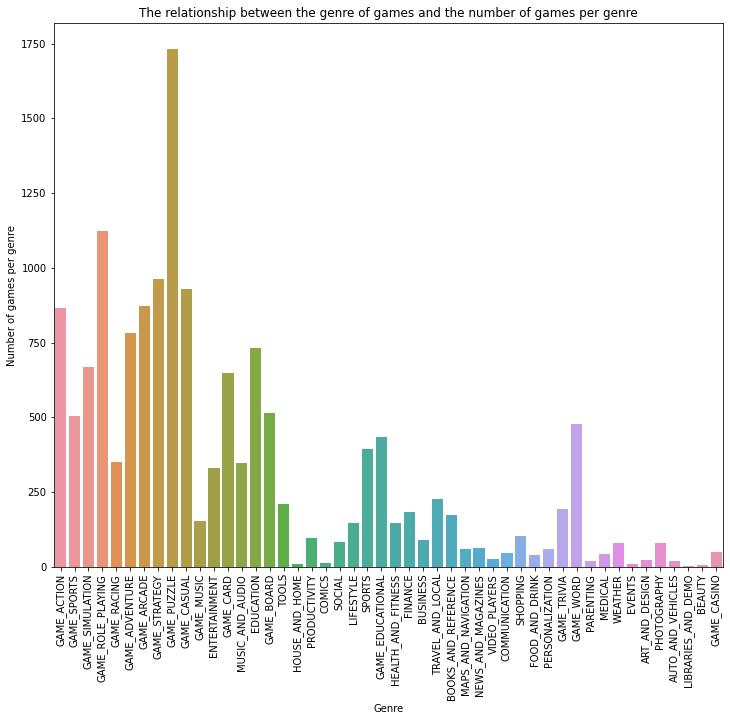

In [26]:
plt.figure(figsize=(12, 10))
plt.title("The relationship between the genre of games and the number of games per genre")
plt.xlabel("Genre")
plt.ylabel("Number of games per genre")
plt.xticks(rotation=90)
sb.barplot(a, b)
#plt.savefig("genre_list.png")

Now to check whether the games are free or not, it is necessary to convert some lower classed words into Upper class words.

In [0]:
data['Free'] = data['Free'].str.upper()

In [28]:
is_paid=pd.Categorical(data['Free'])
is_paid.describe()

,counts,freqs
categories,,
FALSE,1736,0.114716
TRUE,13048,0.862222
NaN,349,0.023062


Obtaining the minimum, maximum and mean values of the rating score of games and plotted in accordance with the genres.

In [29]:
game_genre = data[['Genre ID','Score']].groupby(['Genre ID']).agg(["max", "min","mean"])

game_genre.reset_index(inplace = True)
print(game_genre.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (Genre ID, )   48 non-null     object 
 1   (Score, max)   48 non-null     float64
 2   (Score, min)   48 non-null     float64
 3   (Score, mean)  48 non-null     float64
dtypes: float64(3), object(1)
memory usage: 1.6+ KB
None


In [30]:
np.array(game_genre['Score']['max'])

array([4.72     , 4.8333335, 4.791579 , 4.9      , 5.       , 4.9692307,
       4.86     , 5.       , 5.       , 4.6666665, 5.       , 4.89     ,
       5.       , 5.       , 4.93     , 4.9619045, 5.       , 4.8337417,
       4.96     , 5.       , 5.       , 5.       , 4.952381 , 5.       ,
       4.969697 , 4.8046875, 4.8867927, 4.93     , 5.       , 4.9      ,
       5.       , 4.74     , 5.       , 4.9166665, 4.8867593, 5.       ,
       4.9473686, 4.85     , 5.       , 4.8581758, 5.       , 5.       ,
       5.       , 5.       , 5.       , 5.       , 4.6859236, 4.868421 ])

Plotting the ratings score with respect to genres.

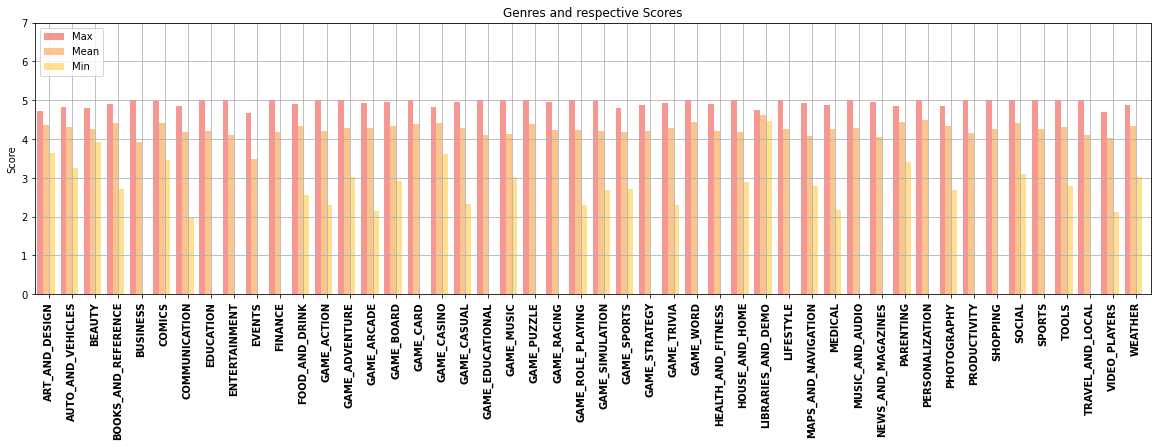

In [31]:
# Setting the positions and width for the bars
pos = list(range(len(game_genre['Score']['max']))) 
width = 0.25 
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(20,5))

# Create a bar with pre_score data,
# in position pos,
plt.bar(pos, game_genre['Score']['max'], width, alpha=0.5, color='#EE3224',label=game_genre['Genre ID'][0]) 
plt.bar([p + width for p in pos],  game_genre['Score']['mean'], width, alpha=0.5, color='#F78F1E', label=game_genre['Genre ID'][1]) 
plt.bar([p + width*2 for p in pos], game_genre['Score']['min'], width, alpha=0.5, color='#FFC222', label=game_genre['Genre ID'][2]) 

# Set the y axis label
ax.set_ylabel('Score')
ax.set_title('Genres and respective Scores')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])
ax.set_xticklabels(game_genre['Genre ID'], fontweight='bold',rotation='vertical')

plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, 2+max(game_genre['Score']['max'])] )

# Adding the legend and showing the plot
plt.legend(['Max', 'Mean', 'Min'], loc='upper left')
plt.grid()
plt.show()

By looking at the above plot, it is considered to plot the mean of game ratings score with respect to genres, to check the average mean of the score of games.

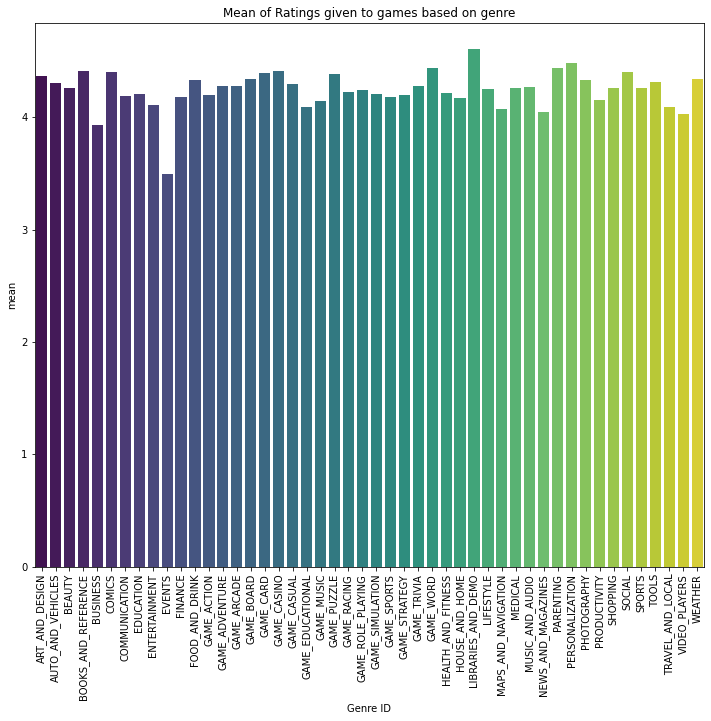

In [32]:
# plt.rcParams.update({'font.size': 8})
plt.figure(figsize= (12,10))
sb.barplot(x =game_genre['Genre ID'], y = game_genre['Score']['mean'],palette="viridis")
plt.title('Mean of Ratings given to games based on genre') 
plt.xticks(rotation=90)   
plt.show()

Moving on, the games were estimated with respect to genres and minimum installs of those games. Group by function is used to group the minimum installs by genre id.

In [0]:
game_genre_installs = data[['Genre ID','MinInstalls']].groupby(['Genre ID']).mean()

game_genre_installs.reset_index(inplace = True)
game_genre_installs['Genre ID']
game_genre_installs=game_genre_installs.sort_values('MinInstalls',ascending=False)

In [0]:
labels = np.array(game_genre_installs['Genre ID'])
sizes = np.array(game_genre_installs['MinInstalls'])

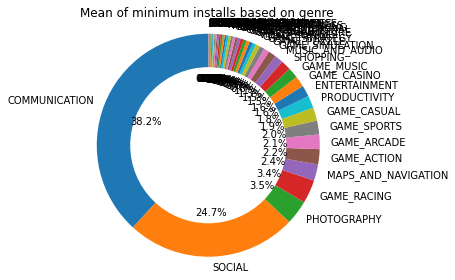

In [35]:
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.title('Mean of minimum installs based on genre')
plt.tight_layout()
plt.show()

Different currency options listed for the games in the dataset were listed.

In [36]:
is_curr=pd.Categorical(data['Currency'])
is_curr.describe()

,counts,freqs
categories,,
EUR,2,0.000132
USD,15111,0.998546
NaN,20,0.001322


Grouping games by genre and their availability as free or non free versions.

In [37]:
game_ava = data[['Genre ID','Score','Free']].groupby(['Genre ID','Free']).mean().unstack()
# game_ava.reset_index(inplace = True)
game_ava

Score          
Free                    FALSE      TRUE
Genre ID                               
ART_AND_DESIGN       4.463333  4.356684
AUTO_AND_VEHICLES    4.500000  4.275223
BEAUTY                    NaN  4.257069
BOOKS_AND_REFERENCE  4.382685  4.413895
BUSINESS             0.000000  3.971405
COMICS                    NaN  4.401221
COMMUNICATION        4.301591  4.176565
EDUCATION            3.939076  4.245918
ENTERTAINMENT        4.013810  4.110919
EVENTS                    NaN  3.495506
FINANCE              4.239711  4.173980
FOOD_AND_DRINK            NaN  4.327703
GAME_ACTION          4.185552  4.197132
GAME_ADVENTURE       4.332293  4.251306
GAME_ARCADE          4.279478  4.273138
GAME_BOARD           4.254370  4.359668
GAME_CARD            4.501289  4.390327
GAME_CASUAL          4.258538  4.295699
GAME_EDUCATIONAL     3.762167  4.125411
GAME_MUSIC           4.480218  4.111265
GAME_PUZZLE          4.437629  4.379633
GAME_RACING          4.197313  4.229033
GAME_ROLE_PLAYING    4.348953  4.208830
GAME_SIMULATION      4.098445  4.226300
GAME_SPORTS          4.076024  4.183514
GAME_STRATEGY        4.303569  4.167188
GAME_TRIVIA          4.239413  4.277531
GAME_WORD            4.384972  4.440350
HEALTH_AND_FITNESS   4.417004  4.205383
HOUSE_AND_HOME       4.050000  4.185625
LIBRARIES_AND_DEMO        NaN  4.605000
LIFESTYLE            4.166816  4.261732
MAPS_AND_NAVIGATION  3.836525  4.123207
MEDICAL              4.344760  4.239564
MUSIC_AND_AUDIO      4.141291  4.292032
NEWS_AND_MAGAZINES   4.230000  4.042131
PARENTING                 NaN  4.438906
PERSONALIZATION      4.574706  4.443394
PHOTOGRAPHY          4.200679  4.351509
PRODUCTIVITY         4.219662  4.140316
SHOPPING             2.890000  4.267152
SOCIAL               3.804993  4.419850
SPORTS               4.278847  4.255679
TOOLS                4.468044  4.292768
TRAVEL_AND_LOCAL     3.662219  4.093873
VIDEO_PLAYERS        3.780000  4.034914
WEATHER              4.418053  4.314795

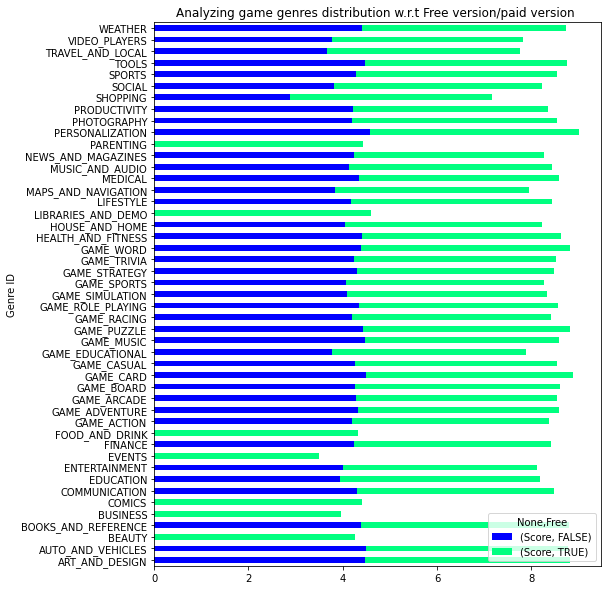

In [38]:
game_ava.plot(kind='barh', stacked=True, title='Analyzing game genres distribution w.r.t Free version/paid version ', figsize=[8,10], colormap='winter')

Once all the basic visualizations are done, we can see that there exist certain patterns between the features of the dataset. But our main concern is about game description. So further analysis is done on the game description.

**FURTHER TEXT ANALYSIS AND TEXT CLASSIFICATIONS**

To work on the game description and clean it as much as possible certain text analysis techniques specified below were applied to the description feature.

In [0]:
data['Description']  = data['Description'].str.lower()

In [0]:
sam=data['Description'].str.extract(r'(^\w{2})')

In [41]:
print(len(sam))

15133


Once converting the description of each game into lower case, the most frquent words used in each game description were extracted to check their frequency in the descriptions.

In [0]:
# Checking the first 10 most frequent words

cnt = Counter()
for text in data["Description"].values:
    for word in text.split():
        cnt[word] += 1
        
#cnt.most_common(100)

In [43]:
# Removing the frequent words
freq = set([w for (w, wc) in cnt.most_common(10)])
# function to remove the frequent words
def freqwords(text):
    return " ".join([word for word in str(text).split() if word not in freq])

# Passing the function freqwords
data["Description"] = data["Description"].apply(freqwords)
data["Description"].head()


0    welcome world sniper assassin. hold back achie...
1    duty is lead battle become best shooter sniper...
2    welcome shooting world, an incredible 3d fps m...
3    aim shoot! modern sniper is #1 first person sh...
4    time collect hunting gear, load gun, sharpen s...
Name: Description, dtype: object

Next, we will be removing the urls, web addresses, and emoji's if any exsisting in the game descriptions using the following methods.

In [0]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

In [0]:
data['Description']=data['Description'].apply(lambda x:remove_urls(x))

The beautiful soup library imported is used below to remove the html addresses.

In [0]:
def remove_html(text):
    return BeautifulSoup(text, "lxml").text

In [0]:
data['Description']=data['Description'].apply(lambda x:remove_html(x))

In [48]:
# 20 rare words in the game description were extracted and deleted 
freq = pd.Series(' '.join(data['Description']).split()).value_counts()[-20:] # 10 rare words
freq = list(freq.index)
data['Description'] = data['Description'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
data['Description'].head(20)

0     welcome world sniper assassin. hold back achie...
1     duty is lead battle become best shooter sniper...
2     welcome shooting world, an incredible 3d fps m...
3     aim shoot! modern sniper is #1 first person sh...
4     time collect hunting gear, load gun, sharpen s...
5     fight for honor! pick up cool sniper guns at h...
6     feel action survive this apocalypse horror one...
7     get ready for an epic multiplayer sniper 3d fr...
8     welcome "death shooter ". as special force, wi...
9     modern strike online can't get enough fps acti...
10    keep defense up shoot zombies one best first-p...
11    get ready for one best fps sniper shooting gam...
12    join most exciting multiplayer archery game ev...
13    join best online multiplayer shooting range ex...
14    like killing games? if so sniper 3d shooter is...
15    death race ® killer car shooting games, offici...
16    😏 ready roll dice on life crime? then city veg...
17    become #1 most lethal sniper world play do

In [0]:
# Function to remove emoji.
def emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  
                           u"\U0001F680-\U0001F6FF"  
                           u"\U0001F1E0-\U0001F1FF"  
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

The clean description function is defined that contations the methods to remove punctuations, segregating the words into tokens and calling the stopwords to remove essential amount of stopwords. The function is called and applied on the cleaned description.

In [0]:
def clean_description(text):
  text_nopunctuation= "".join([char for char in text if char not in string.punctuation])
  text_nopunctuation=emoji(text_nopunctuation)

  tokens=word_tokenize(text_nopunctuation)
  # re.split('\W+',text_nopunctuation)
  words = [word for word in tokens if word in all_words or not word.isalpha()]
  text= [word for word in words if word not in stopword]
 
  return text

In [0]:
data['Cleaned_Text']=data['Description'].apply(lambda x:clean_description(x))

In [52]:
data['Cleaned_Text'][:10]

0    [welcome, world, sniper, assassin, hold, back,...
1    [duty, lead, battle, become, best, shooter, sn...
2    [welcome, shooting, world, incredible, 3d, mob...
3    [aim, shoot, modern, sniper, 1, first, person,...
4    [time, collect, hunting, gear, load, gun, shar...
5    [fight, honor, pick, cool, sniper, hand, exper...
6    [feel, action, survive, apocalypse, horror, on...
7    [get, ready, epic, sniper, 3d, free, shooting,...
8    [welcome, death, shooter, special, force, rece...
9    [modern, strike, cant, get, enough, action, lo...
Name: Cleaned_Text, dtype: object

As the basic tokenizing and cleaning of the text data is done, lemmatizing the text need to be done to obtain a root word for all similar meaning words. Words need to be lemmatized to group words which possess same meaning, context so that the data available after lemmatizing can be fitted to the model.

The NLTK uses wordnet lemmatizer library and imports the function on to the environment.

In [53]:
wn=nltk.WordNetLemmatizer()
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
def lemmatizing(tokenized_text):
  text=[wn.lemmatize(word) for word in tokenized_text]
  return text

In [0]:
data['lemmetized_desc']=data['Cleaned_Text'].apply(lambda x: lemmatizing(x))

The tokens of words available after all the analysis is done are gruped into sentence or string of values, for further analysis.

In [0]:
rowitems=[]

for row in data['lemmetized_desc']:
  # row = ' '.join([row])
  rowitems.append(' '.join(row))

data['Cleaned']=rowitems

In [0]:
data['Description_Length']=data['Description'].apply(lambda x: len(x))

In [0]:
data['CleanedDesc_Length']=data['Cleaned'].apply(lambda x: len(x))

The original game description and the cleaned text length is documented to check the difference of the length of words. This can help us view that most of the common data in the description were filtered out. Leaving the important stuff.

In [0]:
def sort_function(matrix):
    tuples = zip(matrix.col, matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)

TF_IDF vectorizer is applied on the clean description to obtain the feature names.

In [60]:
#METHOD 1

# analyzer=clean_description
tfidf_vect=TfidfVectorizer()
tf_counts=tfidf_vect.fit_transform(data['Cleaned'])
print(tf_counts.shape)
print(tfidf_vect.vocabulary_.keys())

(15133, 26348)
dict_keys(['welcome', 'world', 'sniper', 'assassin', 'hold', 'back', 'achieve', 'perfect', 'shot', 'target', 'play', 'amazing', 'gun', 'shooting', 'game', 'action', 'going', 'unlimited', 'love', 'fighter', 'category', 'offer', 'need', 'find', 'favorite', 'bet', 'provide', 'best', 'gaming', 'experience', 'unique', 'first', 'impression', 'taking', 'care', 'usage', 'shooter', 'complete', 'without', 'connection', 'among', 'top', '10', 'graphic', 'new', 'zombie', 'mode', 'undead', 'added', 'kill', 'unkilled', 'dead', 'praise', 'honor', 'made', 'huge', 'far', 'release', 'stood', '2018', 'consistently', 'continue', 'improving', 'basis', 'user', 'feedback', 'right', 'claim', 'stand', '2020', 'collection', 'variety', 'store', 'upgrade', 'maximum', 'level', 'see', 'got', 'buy', 'arsenal', 'make', 'people', 'forget', 'waste', 'time', 'try', 'install', 'free', 'different', 'interesting', 'become', 'get', 'player', 'look', 'exciting', 'eliminate', 'bad', 'guy', 'holding', 'start', 'd

Now count vector is applied to eliminate the most repeated words the result is passed to the TF-IDF transformer.

In [61]:
#METHOD 2

# creating a list of words that eliminates 75% of the most repeated words and keeps only the remaining
cv=CountVectorizer(max_df=0.75,stop_words=stopword)
word_count_vector=cv.fit_transform(data['Cleaned'])

#applying Tf-Idf for the acquired words
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count_vector)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

after transforming the obtained feature names were gathered.

In [62]:
feature_names=cv.get_feature_names()
len(cv.vocabulary_.keys())

26255

We are declaring a method to sort the words of the user given text and to give the  TF-IDF frequency score of top n words in the given text. This method will be called when a user provides his/her text and shows the top n words in his description that are most likely to be kept in his description based on the TF-IDF score.

In [0]:
# METHOD 3
#take only the feature names and tf-idf score of top n items
def extract_top_vector_keywords(feature_names, all_features, topn=10):
  ten_features=all_features[:topn]
  # to store the top features and their scores  
  scores = []
  features = []
  for index, score in ten_features:
    scores.append(round(score,3))
    features.append(feature_names[index])

  results= {}
  for index in range(len(features)):
      results[features[index]]=scores[index]
    
  return results

An other method is declared which states the most rare or unfrequent words available in the user given description with their TF-IDF score.

In [0]:
#METHOD 4
def extract_rare_keywords(feature_names, all_features, topn=10):
    all_features.reverse()
    del all_features[0:5] # because these are the most frequent common keywords
    ten_features = all_features[:topn]
    # to store the rare features and their scores  
    scores = []
    features = []
    for index, score in ten_features:
        scores.append(round(score, 3))
        features.append(feature_names[index])

    results= {}
    for index in range(len(features)):
        results[features[index]]=scores[index]
    
    return results

Here the methods 3 and 4 were called for a user given description.

In [0]:
#uses method 3 and 4 
def get_tf_idf_predictions(text):
  tf_idf_vector=tfidf_transformer.transform(cv.transform([text]))
  sorted_values=sort_function(tf_idf_vector.tocoo())
  top_keywords=extract_top_vector_keywords(feature_names,sorted_values,12)
  rare_keywords=extract_rare_keywords(feature_names,sorted_values,10)
  return top_keywords,rare_keywords

Now we are considering the game description along with title of the game, is rating score and Genre ID. We are passing the features data to the coun vectorizer and then using the TF-IDF transformer to transform the data and get its feature values.

In [66]:

X=data['Cleaned']+str(data['Score'])+data['Titlle']+str(data['Genre ID'])

cv2=CountVectorizer(max_df=0.75,stop_words=stopword)
word_count_vector2=cv2.fit_transform(X)

tfidf_transformer2=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer2.fit(word_count_vector2)
all_features=cv2.get_feature_names()
len(cv2.vocabulary_.keys())

39834

Below we are calling the methods that are used to extract top n words and its tf-idf score along with rare words and their tf-idf score for a user  given text considering the genre Id, title, score and description of the dataset.

In [0]:
#uses method 3 and 4 for the transformed text with respect to genre, score, title, description
def get_genre_based_predictions(text):
  vectors=tfidf_transformer2.transform(cv2.transform([text]))
  sorted_values=sort_function(vectors.tocoo())
  top_keywords=extract_top_vector_keywords(all_features,sorted_values,15)
  rare_keywords=extract_rare_keywords(all_features,sorted_values,10)
  return top_keywords,rare_keywords

In [0]:
def print_function(x):
  for k in x:
    value=x[k]
    print(k +": ",round(value*100,4))

The above method is used to obtaine a rounded percentage value of the tf-idf score for each word.

**MODEL IMPLEMENTATION**

Now for the K-Means clustering model we are using Mini Batch K-Means to attain the clusters. 

In [0]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        # sse.append(MiniBatchKMeans(n_clusters=k, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot (Elbow Method)')

The above defined method is called by feeding the model with TF-IDF vectorized data, but not the transformed data, The transformed data is only used to get the most important and rare words of the user given description with tf-idf score. 
Here for the model to form cluster only vectorized data (tf_count) is passed.

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters
Fit 22 clusters
Fit 24 clusters
Fit 26 clusters
Fit 28 clusters
Fit 30 clusters
Fit 32 clusters
Fit 34 clusters
Fit 36 clusters
Fit 38 clusters
Fit 40 clusters


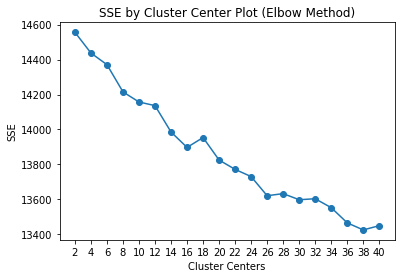

In [70]:
find_optimal_clusters(tf_counts, 40) # based on only game description that is cleaned

In [71]:
#following are used for keywords prediction through CLUSTERING done based on only game descriptions

true_k = 16
k_model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
%time k_model.fit(tf_counts)

CPU times: user 43.5 s, sys: 3.93 s, total: 47.4 s
Wall time: 42.7 s


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=16, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
order_centroids = k_model.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_vect.get_feature_names()

In [0]:
def display_top_keywords(true_k,words_count):
  for i in range(true_k):
    print("\nCluster %d: " % i),
    for indexword in order_centroids[i, :words_count]:
      print("%s" % terms[indexword])

Above we defining a method that can be callable to display the top n keywords of the predicted cluster based on user description.

And below is the method to get the cluster keywords generated.

In [0]:
def display_cluster_keywords(cluster_number,words_count):
  cluster_keywords=[]
  for indexword in order_centroids[cluster_number, :words_count]:
    cluster_keywords.append(terms[indexword])
    # print("%s" % terms[indexword])
  return cluster_keywords

The rare or most unlikely words that are not to be added to the description are extracted below.

In [0]:
def display_cluster_rare_words(cluster_number,words_count):
  cluster_keywords=[]
  rare_words_centroids=order_centroids[::-1] # reverse the array
  for indexword in rare_words_centroids[cluster_number, :words_count]:
    cluster_keywords.append(terms[indexword])
    # print("%s" % terms[indexword])
  return cluster_keywords

Base on the trained data the model will be predicting a cluster in which the example user description falls into. The predicted clusteris gathered along with the cluster words and rare words that are defined in above method. 

In [0]:
# METHOD 6
def get_cluster_predictions(text):
  test_X = tfidf_vect.transform([text])
  predicted = k_model.predict(test_X)
  cluster_topwords=display_cluster_keywords(int(predicted),20)
  cluster_rarewords=display_cluster_rare_words(int(predicted),10)
  test_tokens=re.split('\W+',text)
  suggest_words=[i for i in test_tokens + cluster_topwords if i not in test_tokens ] ## list1 - list2
  must_words=[i for i in cluster_topwords if i not in suggest_words]
  return predicted, must_words,suggest_words,cluster_rarewords

Below we are providing an example game description to texst the model.

In [0]:
#give the description that has to be predicted
test_description='Escape to the world of farming, friends and fun! Go on farm adventures to collect rare goods and craft new recipes. Raise animals and grow your farm with friends. Join a farm Co-Op to trade and share or play on your own in Anonymous Mode. You can play FarmVille anytime, anywhere… even when not connected to the internet. Best of all, the world’s most popular farming game is free to play'

For the given example description, the model geerated cluster in which the description falls into, the keywords of that cluster, the words that need to be added to the description apart from the existing ones and finally the words that shouldnt be added to description were printed out over here using the method get cluster prediction defined above as method 6.

In [78]:
x,y,z,w=get_cluster_predictions(test_description)
print(x)
print(y)
print(z)
print(w)

[13]
['game', 'play', 'new', 'world', 'free']
['get', 'battle', 'time', 'use', 'best', 'different', 'make', 'one', 'mode', 'unique', 'like', 'team', 'find', 'build', 'experience']
['word', 'game', 'search', 'brain', 'crossword', 'puzzle', 'play', 'find', 'vocabulary', 'fun']


All the results generated were clearly defined by declaring a method that calls all the methods defined above and printed  for a breif understanding.

In [0]:
def all_suggestions(text):
  a,b,c,d=get_cluster_predictions(text)
  e,f=get_tf_idf_predictions(text)
  g,h=get_genre_based_predictions(text)
  print("Predicted Cluster : ",a)
  print("\nWords that are must to be kept in description : ",b)
  print("\nWords to be Added (Suggestion from Clustering model) :",c)
  print("\nWords not to be Added (Suggestion from Clustering model) :",d)
  print("\nTF-IDF score determinations from trained Game Descriptions")
  #KEYWORDS that are likely to be expected from this given type of game
  print("Keywords in the given description that are more likely interested to keep: \n")
  print_function(e)
  #KEYWORDS that are likely to be expected from this given type of game
  print("\nKeywords in the given description that are not very likely interested to keep: \n")
  print_function(f)

  print("\nTF-IDF score determinations from trained Game Descriptions+Genre+Title+Score/Rating")
  print("Keywords in the given description that are more likely interested to keep based on the Genre and Score Ratings: \n")
  print_function(g)
  print("\nKeywords in the given description that are not very likely interested to keep based on the Genre and Score Ratings:")
  print_function(h)


The all suggestion method is applied to the exaample description that is given above and the outputs were printed.

In [80]:
all_suggestions(test_description)

Predicted Cluster :  [13]

Words that are must to be kept in description :  ['game', 'play', 'new', 'world', 'free']

Words to be Added (Suggestion from Clustering model) : ['get', 'battle', 'time', 'use', 'best', 'different', 'make', 'one', 'mode', 'unique', 'like', 'team', 'find', 'build', 'experience']

Words not to be Added (Suggestion from Clustering model) : ['word', 'game', 'search', 'brain', 'crossword', 'puzzle', 'play', 'find', 'vocabulary', 'fun']

TF-IDF score determinations from trained Game Descriptions
Keywords in the given description that are more likely interested to keep: 

friends:  46.6
farm:  40.7
farming:  32.5
anytime:  26.2
animals:  26.2
co:  25.0
adventures:  22.4
anonymous:  19.9
raise:  13.9
play:  13.9
connected:  13.8
trade:  13.3

Keywords in the given description that are not very likely interested to keep: 

even:  7.5
mode:  7.7
collect:  7.7
go:  7.9
join:  8.1
share:  9.1
popular:  10.1
anywhere:  10.2
world:  11.2
grow:  11.4

TF-IDF score determin

In [0]:
#import pickle
#pickle.dump(k_model, open('/content/game/suggestion.pk1', 'wb'))